In [1]:
from PIL import Image

from skimage import io, transform

import torch

import torch.nn as nn

import torchvision

import torch.optim as optim

import time

import copy

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms

import pandas as pd

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

from torchvision import datasets, models

In [3]:
image_tr = transforms.Compose([transforms.Resize(250),

                              transforms.CenterCrop(224),

                              transforms.ToTensor(),

                              transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [4]:
image_temp = transforms.Compose([transforms.RandomRotation(50)])

In [5]:

class Image_dataset(Dataset):

    def __init__(self, csv_file, transform = None):

        self.ind = pd.read_csv(csv_file)

        self.transform = transform   
        
        
    def __len__(self):

       return len(self.ind)

    def __getitem__(self,idx):

       image_path = self.ind["filename"].loc[idx]

       #image = io.imread(image_path)

       image = Image.open(image_path)

       label = self.ind["Category"].loc[idx]

       #label_x = self.ind["Value_x"].loc[idx]

       if self.transform:

           image = self.transform(image)

       #sample = {'image': image, 'label': label}

       return image,label,image_path
    


In [69]:
image_data = Image_dataset("Cats_and_dogs.csv", image_tr)

In [70]:
image_data.__getitem__(11113)[0]

tensor([[[-1.6213, -1.5870, -1.4843,  ...,  0.1939,  0.2453,  0.2796],
         [-1.6727, -1.6898, -1.6213,  ...,  0.2111,  0.2282,  0.2282],
         [-1.4843, -1.5870, -1.6213,  ...,  0.1254,  0.1426,  0.1426],
         ...,
         [ 0.2111,  0.1083,  0.1768,  ...,  0.7248,  0.7591,  0.7419],
         [ 0.1939,  0.0569,  0.1254,  ...,  0.7762,  0.8104,  0.7591],
         [ 0.2111,  0.2282,  0.3652,  ...,  0.8104,  0.7762,  0.7248]],

        [[-1.3529, -1.3179, -1.2129,  ...,  0.0301,  0.0476,  0.0476],
         [-1.3880, -1.4230, -1.3529,  ...,  0.0301,  0.0126, -0.0399],
         [-1.1604, -1.2829, -1.3354,  ..., -0.0399, -0.0749, -0.1099],
         ...,
         [ 0.0301, -0.0749,  0.0126,  ...,  0.6078,  0.6604,  0.6429],
         [ 0.0126, -0.1275, -0.0574,  ...,  0.6604,  0.7129,  0.6604],
         [ 0.0126,  0.0301,  0.1877,  ...,  0.6954,  0.6779,  0.6254]],

        [[-1.1247, -1.0898, -0.9678,  ..., -0.1312, -0.1487, -0.1835],
         [-1.2293, -1.2467, -1.1596,  ..., -0

In [71]:
dl_train = torch.utils.data.DataLoader(image_data, batch_size=7, shuffle=True)

In [72]:
def imshow(inp, title=None):

   """Imshow for Tensor."""

   inp = inp.to("cpu")

   inp = inp.numpy().transpose((1, 2, 0))

   mean = np.array([0.485, 0.456, 0.406])

   std = np.array([0.229, 0.224, 0.225])

   inp = std * inp + mean

   inp = np.clip(inp, 0, 1)

   plt.figure(figsize=[40,40])

   if title is not None:

       plt.title(title)

   plt.imshow(inp)

   plt.pause(0.001)

tensor([0, 1, 0, 1, 0, 1, 1])


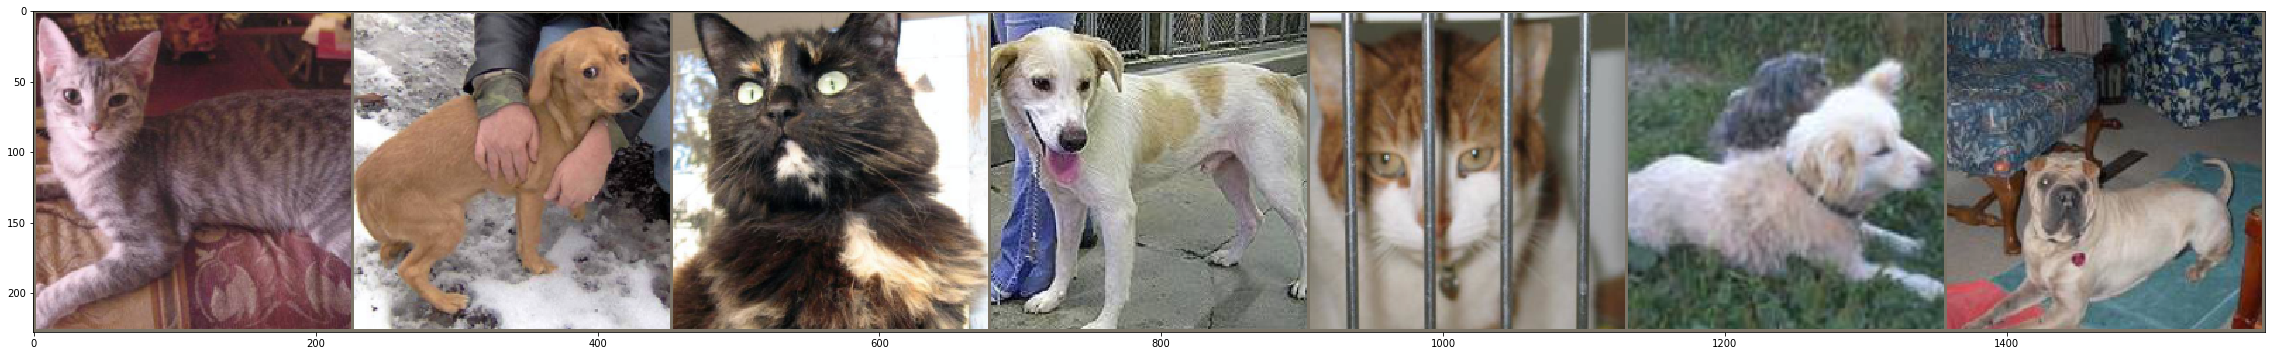

In [73]:
inputs, classes_x,_ = next(iter(dl_train))

print(classes_x)

out = torchvision.utils.make_grid(inputs)

imshow(out)

In [75]:
model_ft = models.resnet18(pretrained=True,)

num_inputs = model_ft.fc.in_features

num_value = len(image_data.ind["Category"].unique())

model_ft.fc = nn.Linear(num_inputs, num_value)

num_inputs, num_value

(512, 2)

In [76]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [77]:
model_ft.fc = nn.Linear(in_features=512, out_features=2)

In [78]:
model_ft(inputs)

tensor([[ 0.3422, -0.2413],
        [ 0.2635,  1.0616],
        [ 0.1870, -0.0721],
        [ 1.0430,  0.1784],
        [-0.1803,  0.1446],
        [ 0.2895,  0.3385],
        [ 0.8266, -0.0544]], grad_fn=<AddmmBackward>)

In [79]:
inputs.shape

torch.Size([7, 3, 224, 224])

In [80]:
c1=model_ft.conv1(inputs)
c1.shape

torch.Size([7, 64, 112, 112])

In [81]:
BN1=model_ft.bn1(c1)
BN1.shape

torch.Size([7, 64, 112, 112])

In [82]:
relu1=model_ft.relu(BN1)
relu1.shape

torch.Size([7, 64, 112, 112])

In [83]:
MP1=model_ft.maxpool(relu1)
MP1.shape

torch.Size([7, 64, 56, 56])

In [84]:
model_ft.layer1[0].conv1(MP1)

tensor([[[[-2.0906e+00, -1.9301e+00, -2.5374e+00,  ..., -1.4057e+00,
           -1.3219e+00, -1.4704e+00],
          [-8.2626e-01, -1.9274e+00, -2.0115e+00,  ..., -4.0236e-01,
           -5.4443e-01, -6.8299e-01],
          [-2.1473e-01,  9.1531e-02,  1.6423e-01,  ..., -1.1897e-01,
           -6.2972e-01, -4.6783e-01],
          ...,
          [-5.3762e-01, -3.9746e-01, -1.2575e-01,  ..., -3.3541e-01,
           -3.3122e-01, -6.6164e-01],
          [-7.0326e-02, -2.3963e-01, -2.2056e-01,  ..., -1.5097e-01,
            1.3137e-02, -3.9508e-01],
          [-1.9927e+00, -1.4593e+00, -1.2185e+00,  ..., -1.8350e+00,
           -1.8234e+00, -1.7651e+00]],

         [[-1.0638e+00, -1.3915e+00, -1.5899e+00,  ...,  5.3871e-01,
            7.1249e-01, -5.8879e-01],
          [-1.2322e-01,  9.4074e-01, -1.7638e-01,  ..., -4.4932e-01,
           -3.8748e-01, -1.6809e+00],
          [-1.7966e-01,  1.0117e+00,  2.6707e-01,  ..., -2.9449e-01,
           -1.0403e+00, -1.6513e+00],
          ...,
     

In [85]:
L1=model_ft.layer1(MP1)
L1.shape

torch.Size([7, 64, 56, 56])

In [86]:
L2=model_ft.layer2(L1)
L2.shape

torch.Size([7, 128, 28, 28])

In [87]:
L3=model_ft.layer3(L2)
L3.shape

torch.Size([7, 256, 14, 14])

In [88]:
L4=model_ft.layer4(L3)
L4.shape

torch.Size([7, 512, 7, 7])

In [89]:
AP=model_ft.avgpool(L4)
AP.shape

torch.Size([7, 512, 1, 1])

In [117]:
out=model_ft(inputs)
out

tensor([[ 0.2824, -0.3601],
        [ 0.2670, -0.0313],
        [ 0.6221,  0.2695],
        [-0.4714,  0.5886],
        [ 0.4004,  0.3584],
        [ 0.2421,  0.3985],
        [ 1.1680,  0.3038]], grad_fn=<AddmmBackward>)

In [92]:
AP[0].transpose(0,1)[:,:,0].shape

torch.Size([1, 512])

In [93]:
AP[0][1][0]

tensor([1.0684], grad_fn=<SelectBackward>)

In [94]:
cel = nn.CrossEntropyLoss()

In [119]:
t=torch.tensor([1,0,1,0,1,1,0])

In [120]:
cel(out,t)

tensor(0.7924, grad_fn=<NllLossBackward>)

In [98]:
output = Variable(torch.FloatTensor([0,0,0,1])).view(1, -1)
target = Variable(torch.LongTensor([3]))
output
cel(output,target)

tensor(0.7437)

In [99]:
import torch.optim as optim
optimizer = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

In [100]:
image_data_iter = iter(dl_train)

In [125]:
inputs, classes_x ,path= next(image_data_iter)
#out,classes_x
cel(out,classes_x)

tensor(0.5715, grad_fn=<NllLossBackward>)

In [128]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dl_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, classes_x ,path= next(image_data_iter)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_ft(inputs)
        loss = cel(outputs, classes_x)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 0.152
[1,    40] loss: 0.235
[1,    60] loss: 0.227
[1,    80] loss: 0.241
[1,   100] loss: 0.129
[1,   120] loss: 0.235
[1,   140] loss: 0.256
[1,   160] loss: 0.107
[1,   180] loss: 0.156
[1,   200] loss: 0.324
[1,   220] loss: 0.164
[1,   240] loss: 0.131
[1,   260] loss: 0.053
[1,   280] loss: 0.214
[1,   300] loss: 0.232
[1,   320] loss: 0.080
[1,   340] loss: 0.166
[1,   360] loss: 0.133
[1,   380] loss: 0.233
[1,   400] loss: 0.200
[1,   420] loss: 0.294
[1,   440] loss: 0.140
[1,   460] loss: 0.119
[1,   480] loss: 0.146
[1,   500] loss: 0.305
[1,   520] loss: 0.151
[1,   540] loss: 0.209
[1,   560] loss: 0.183
[1,   580] loss: 0.205
[1,   600] loss: 0.196
[1,   620] loss: 0.108
[1,   640] loss: 0.151
[1,   660] loss: 0.116
[1,   680] loss: 0.103
[1,   700] loss: 0.133
[1,   720] loss: 0.023
[1,   740] loss: 0.087
[1,   760] loss: 0.068
[1,   780] loss: 0.158
[1,   800] loss: 0.199
[1,   820] loss: 0.279
[1,   840] loss: 0.057
[1,   860] loss: 0.187
[1,   880] 

StopIteration: 

In [155]:
testset = Image_dataset("Cats_and_dogs.csv", image_tr)
testloader = torch.utils.data.DataLoader(testset, batch_size=7,
                                         shuffle=True)

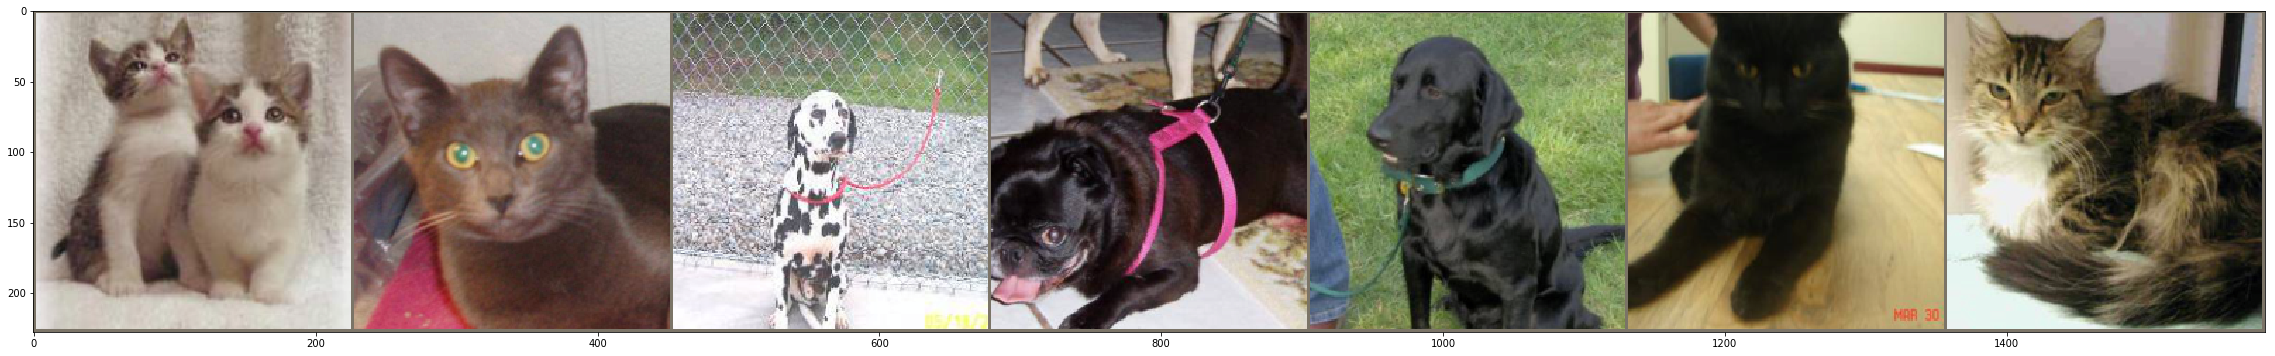

tensor([0, 0, 1, 1, 1, 0, 0])


In [156]:
dataiter = iter(testloader)
inputs, classes_y ,path= dataiter.next()

# print images
imshow(torchvision.utils.make_grid(inputs))
print(classes_y)
#print('GroundTruth: ', ' '.join('%5s' % classes[classes_x[j]] for j in range(4)))

In [157]:
f_out=model_ft(inputs)
_, predicted = torch.max(f_out, 1)
for i in range(7):
    print(predicted[i])

tensor(0)
tensor(0)
tensor(1)
tensor(1)
tensor(1)
tensor(0)
tensor(0)


In [168]:
import os
dict1={}
rootDir = 'F:\Cats and Dogs\Test_images'
j=0
for dirName, subdirList, fileList in os.walk(rootDir):
    #print('Found directory: %s' % dirName)
    for fname in fileList:
        #print('\t%s' % fname)
        dict1[j]=fname
        j=j+1

In [189]:
test_inputs=[]
for i in range(19):
    test_inputs.append('F:\Cats and Dogs\Test_images\\'+list(dict1.items())[i][1])
test_inputs

['F:\\Cats and Dogs\\Test_images\\cute_cat_03_hd_pictures_168993.jpg',
 'F:\\Cats and Dogs\\Test_images\\cute_cat_06_hd_picture_170909.jpg',
 'F:\\Cats and Dogs\\Test_images\\index.jpg',
 'F:\\Cats and Dogs\\Test_images\\index1.jpg',
 'F:\\Cats and Dogs\\Test_images\\index2.jpg',
 'F:\\Cats and Dogs\\Test_images\\index3.jpg',
 'F:\\Cats and Dogs\\Test_images\\index4.jpg',
 'F:\\Cats and Dogs\\Test_images\\index5.jpg',
 'F:\\Cats and Dogs\\Test_images\\index6.jpg',
 'F:\\Cats and Dogs\\Test_images\\d1.jpg',
 'F:\\Cats and Dogs\\Test_images\\d2.jpg',
 'F:\\Cats and Dogs\\Test_images\\d3.jpg',
 'F:\\Cats and Dogs\\Test_images\\d4.jpg',
 'F:\\Cats and Dogs\\Test_images\\d5.jpg',
 'F:\\Cats and Dogs\\Test_images\\d6.jpg',
 'F:\\Cats and Dogs\\Test_images\\d7.jpg',
 'F:\\Cats and Dogs\\Test_images\\d8.jpg',
 'F:\\Cats and Dogs\\Test_images\\d9.jpg',
 'F:\\Cats and Dogs\\Test_images\\d10.jpg']

In [209]:
model_ft(image_tr(Image.open(test_inputs[17])).view(-1,3,224,224))

tensor([[ 1.2813, -0.5857]], grad_fn=<AddmmBackward>)